In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import pandas as pd
plt.rcParams.update({'font.size': 12})

In [2]:
symponset = 4.84

# alpha = 97.19
# beta = 3.718
# shift = 25.63
# mean = alpha/beta - shift
# var = alpha/beta**2
# print(mean," ",var)


Infectivity gamma distribution from Ashcroft 2020 (He et al correction)

In [3]:
t = np.arange(0,31)
# f = stats.gamma.pdf(t + shift - symponset, alpha, scale=1/beta)\
#    /(1-stats.gamma.cdf(shift- symponset, alpha, scale=1/beta))

To turn this into a flat profile, ensure that same % is presymtpomatic

In [4]:
# fstd = stats.gamma.std(alpha, scale=1/beta, loc = symponset-shift)
# fmedian = stats.gamma.median(alpha, scale=1/beta, loc = symponset-shift)
# fpfrac = stats.gamma.cdf(symponset, alpha, scale=1/beta, loc = symponset-shift)

2 params to set U(a,b) for uniform infectiousness, use the following:

1) Proportion of infectiousness pre- and post- symptom onset

2) Std of time of infection

In [5]:
# a = symponset - fpfrac * fstd * np.sqrt(12) 
# b = a + fstd * np.sqrt(12) 
# plt.plot([4.84,4.84],[0,1],':',c=[0.5,0.5,0.5])
# plt.plot(t, f, '--', label='Data')
# plt.plot([np.min(t),a,a,b,b,np.max(t)],[0,0,1/(b-a),1/(b-a),0,0], label='Uniform approx.')
# plt.xlabel('Days since symtpom onset')
# plt.ylabel('Infectivity PDF')
# plt.xlim((np.min(t),np.max(t)))
# plt.ylim((0,0.18))
# plt.title('(a)')
# plt.legend()
# fig = plt.gcf()
# fig.set_size_inches(4.2, 3.5)
# fig.tight_layout()
# fig.savefig('inf_uniform.png', dpi=300)
# print(a,b)

Use gen time dist

2.827589044625463 5.613017088140094
1.6407138519554287 8.278657050934882


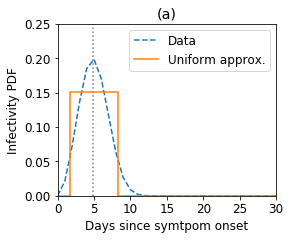

In [6]:
imean = 5.0
istd = 1.92
kguess = (istd/imean)**(-1.086)
cguess = imean / sp.special.gamma(1 + 1/kguess)
f = stats.weibull_min.pdf(t, kguess, scale=cguess)
print(kguess, cguess)
fstd = stats.weibull_min.std(kguess, scale=cguess)
fmedian = stats.weibull_min.median(kguess, scale=cguess)
fpfrac = stats.weibull_min.cdf(symponset, kguess, scale=cguess)
a = symponset - fpfrac * fstd * np.sqrt(12) 
b = a + fstd * np.sqrt(12) 
plt.plot([4.84,4.84],[0,1],':',c=[0.5,0.5,0.5])
plt.plot(t, f, '--', label='Data')
plt.plot([np.min(t),a,a,b,b,np.max(t)],[0,0,1/(b-a),1/(b-a),0,0], label='Uniform approx.')
plt.xlabel('Days since symtpom onset')
plt.ylabel('Infectivity PDF')
plt.xlim((np.min(t),np.max(t)))
plt.ylim((0,0.25))
plt.title('(a)')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(4.2, 3.5)
fig.tight_layout()
fig.savefig('inf_uniform.png', dpi=300)
print(a,b)

3 params to set U(a,b) & P for test positivity

1) Proportion of positivity before onset

2) Area under positivity curve

3) Std in time of positive test

In [6]:
df = pd.read_csv('~/Documents/Github/pcr-profile/PCR_curve_summary.csv')
x = df['days_since_infection'].to_numpy()

P = df['median'].to_numpy()

auc = np.trapz(P,x)
fpbfrac = np.trapz(P[x<=symponset],x[x<=symponset])/auc
mean = np.trapz(P*x,x)/auc
std = np.sqrt(np.trapz(P*(x-mean)**2,x)/auc)

print(auc,' ',fpbfrac, ' ', mean, ' ', std, '\n')

8.565942691549274   0.23428597182282798   9.204703921869559   5.414347201484545 



b - a = np.sqrt(12) * fpbfrac

auc / (np.sqrt(12) * fpbfrac) = sens

a = symponset - 

PCR positivity from day of test Wikramaratna 2020

In [7]:
ap = symponset - fpbfrac * std * np.sqrt(12) 
bp = a + std * np.sqrt(12) 
sens = auc / (bp - ap)
print(ap,' ',bp,' ',sens)

0.4057677164799731   19.546595512667373   0.447522060318389


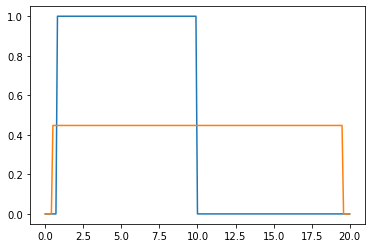

In [8]:
x = np.arange(201)/10
Ifit = np.zeros(201)
Ifit[(x >= a) * (x <= b)] = 1
Pfit = np.zeros(201)
Pfit[(x >= ap) * (x <= bp)] = sens

plt.plot(x,Ifit)
plt.plot(x,Pfit)

PCR with 80% sensitivity, shift AUC to get uniform curve

2.38822210748218 6.943822694939673


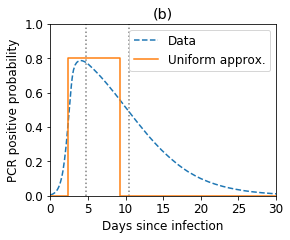

In [68]:
symponset = 4.8
infend = 10.4
fitted = pd.read_csv('~/Documents/Github/pcr-profile/PCR_curve_summary.csv')
psint = np.trapz(fitted['median'][fitted['days_since_infection'] < symponset], \
                 fitted['days_since_infection'][fitted['days_since_infection'] < symponset])
asint = np.trapz(fitted['median'][fitted['days_since_infection'] < infend], \
                 fitted['days_since_infection'][fitted['days_since_infection'] < infend])
sens = 0.8
a = symponset - psint /sens
b = symponset + (asint - psint) / sens
plt.plot([symponset,symponset],[0,1],':',c=[0.5,0.5,0.5])
plt.plot([infend,infend],[0,1],':',c=[0.5,0.5,0.5])
plt.plot(fitted['days_since_infection'],fitted['median'],'--',label='Data')
plt.plot([0,a,a,b,b,30],[0,0,sens,sens,0,0],label='Uniform approx.')

print(a,b-a)
plt.xlim((0,30))
plt.ylim((0,1))
plt.legend()
plt.title('(b)')
plt.xlabel('Days since infection')
plt.ylabel('PCR positive probability')
fig = plt.gcf()
fig.set_size_inches(4.2, 3.5)
fig.tight_layout()
fig.savefig('PCR_uniform.png', dpi=300)

LFT with 65% sensitivity

2.7761035939671292 5.111603220429119


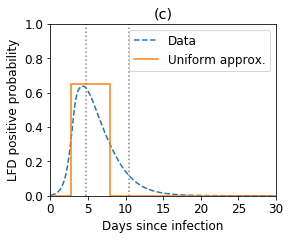

In [69]:
fitted = pd.read_csv('~/Documents/Github/pcr-profile/LFT_curve_summary.csv')
psint = np.trapz(fitted['median'][fitted['days_since_infection'] < symponset], \
                 fitted['days_since_infection'][fitted['days_since_infection'] < symponset])
asint = np.trapz(fitted['median'][fitted['days_since_infection'] < infend], \
                 fitted['days_since_infection'][fitted['days_since_infection'] < infend])
sens = 0.65
a = symponset - psint / sens
b = symponset + (asint - psint) / sens
plt.plot([symponset,symponset],[0,1],':',c=[0.5,0.5,0.5])
plt.plot([infend,infend],[0,1],':',c=[0.5,0.5,0.5])
plt.plot(fitted['days_since_infection'],fitted['median'],'--',label='Data')
plt.plot([0,a,a,b,b,30],[0,0,sens,sens,0,0],label='Uniform approx.')
print(a,b-a)
plt.legend()
plt.xlim((0,30))
plt.ylim((0,1))
plt.title('(c)')
plt.xlabel('Days since infection')
plt.ylabel('LFD positive probability')
fig = plt.gcf()
fig.set_size_inches(4.2, 3.5)
fig.tight_layout()
fig.savefig('LFD_uniform.png', dpi=300)

PCR with variable sensitivity

In [ ]:
fitted = pd.read_csv('~/Documents/Github/pcr-profile/PCR_curve_summary.csv')
psint = np.trapz(fitted['median'][fitted['days_since_infection'] < symponset], \
                 fitted['days_since_infection'][fitted['days_since_infection'] < symponset])
asint = np.trapz(fitted['median'][fitted['days_since_infection'] < infend], \
                 fitted['days_since_infection'][fitted['days_since_infection'] < infend])
sens = (asint - psint)/(infend - symponset)

a = symponset - psint / sens
b = symponset + (asint - psint) / sens
plt.plot(fitted['days_since_infection'],fitted['median'])
plt.plot([0,a,a,b,b,30],[0,0,sens,sens,0,0])
plt.plot([symponset,symponset],[0,1],'--',c='k')
plt.plot([infend,infend],[0,1],'--',c='k')
print(sens,a,b-a)

LFT with variable sensitivity

In [1]:
fitted = pd.read_csv('~/Documents/Github/pcr-profile/LFT_curve_summary.csv')
psint = np.trapz(fitted['median'][fitted['days_since_infection'] < symponset], \
                 fitted['days_since_infection'][fitted['days_since_infection'] < symponset])
asint = np.trapz(fitted['median'][fitted['days_since_infection'] < infend], \
                 fitted['days_since_infection'][fitted['days_since_infection'] < infend])
sens = (asint - psint)/(infend - symponset)
a = symponset - psint / sens
b = symponset + (asint - psint) / sens
plt.plot(fitted['days_since_infection'],fitted['median'])
plt.plot([0,a,a,b,b,30],[0,0,sens,sens,0,0])
plt.plot([symponset,symponset],[0,1],'--',c='k')
plt.plot([infend,infend],[0,1],'--',c='k')
print(a,b-a)

NameError: name 'pd' is not defined

(0, 0.2)

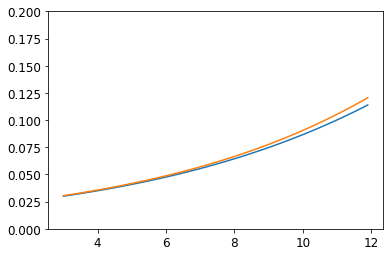

In [39]:
V = np.arange(3,12,0.1)
beta = 0.38
beta2 = 0.16
alpha = np.log(0.05)
p1 = np.exp(alpha + beta*(V-6))/(1 + np.exp(alpha + beta*(V-6)))
p1nh = np.exp(alpha + beta2*(V-6))/(1 + np.exp(alpha + beta2*(V-6)))
p2 = 1 - np.exp(-np.exp(alpha)*np.exp(beta*(V-6)))
p2nh = 1 - np.exp(-np.exp(alpha)*np.exp(beta2*(V-6)))
plt.plot(V,p1nh)
plt.plot(V,p2nh)
plt.ylim((0,0.2))

In [ ]:
#We could fit (1 - exp(-t*beta*exp(l*(V - V0)))) to the probability
#where t = t1 for hh and t2 for non hh